In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import time
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
ds=pd.read_csv("TrainingDataset.arff.txt",header=None, comment='@')
train, test = train_test_split(ds, test_size=0.2)
X_test = test.iloc[:,:np.shape(train)[1]-1]
Y_test = test.iloc[:,-1]

In [22]:
elapsed_time= time.time()
start_time= time.time()


C_range = np.logspace(-3 , 3, num=7)
parameters = {'C':C_range, 'kernel':['linear']}
train_scores_matrix = []
validation_scores_matrix = []
test_scores_matrix = []
best_estimators=[]

for n in range(0,10): 
    print("Iterazione",n)
    train_scores=[]
    validation_scores=[]
    test_scores=[]
    #mescolo i campioni in train e validation set
    train= shuffle(train)
    X_train = train.iloc[:,:np.shape(train)[1]-1]
    Y_train = train.iloc[:,-1]
    #GridSearch con i parametri definiti sopra
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters, cv=5, scoring="accuracy",n_jobs=-1, return_train_score=True)
    clf.fit(X_train, Y_train)
    best_estimators.append(clf.best_params_)
    
    for i in range(0,len(clf.cv_results_['params'])):
        print ("Modello:",clf.cv_results_['params'][i], "accuracy:",clf.cv_results_['mean_test_score'][i])
    
    #combinazioni di parametri
    hyperparameters = []
    for i in clf.cv_results_['params']:
        hyperparameters.append(i)
    
    #score sul test set per ogni combinazione
    for i in hyperparameters:
        temp_class = svm.SVC(kernel=i['kernel'],C=i['C'])
        temp_class.fit(X_train,Y_train)
        #n risultati sul test set 
        test_scores.append(temp_class.score(X_test,Y_test))
        
    for i in range (0,len(clf.cv_results_['mean_test_score'])): 
        validation_scores.append(clf.cv_results_['mean_test_score'][i])  
        train_scores.append(clf.cv_results_['mean_train_score'][i])
    
    #train validation e test scores per ogni shuffle
    train_scores_matrix.append(train_scores)
    validation_scores_matrix.append(validation_scores)
    test_scores_matrix.append(test_scores)
    
    elapsed_time=time.time()-elapsed_time
    print("\nElapsed time:",elapsed_time)

print(best_estimators)

elapsed_time=time.time()-start_time
print("\nTotal elapsed time:",elapsed_time)

Iterazione 0
Modello: {'C': 0.01, 'kernel': 'linear'} accuracy: 0.9231117141564903
Modello: {'C': 0.1, 'kernel': 'linear'} accuracy: 0.9268430574400723
Modello: {'C': 1.0, 'kernel': 'linear'} accuracy: 0.9275214834916328
Modello: {'C': 10.0, 'kernel': 'linear'} accuracy: 0.9275214834916328
Modello: {'C': 100.0, 'kernel': 'linear'} accuracy: 0.9276345545002261

Elapsed time: 93.01322531700134
Iterazione 1
Modello: {'C': 0.01, 'kernel': 'linear'} accuracy: 0.9234509271822705
Modello: {'C': 0.1, 'kernel': 'linear'} accuracy: 0.927860696517413
Modello: {'C': 1.0, 'kernel': 'linear'} accuracy: 0.9275214834916328
Modello: {'C': 10.0, 'kernel': 'linear'} accuracy: 0.9274084124830394
Modello: {'C': 100.0, 'kernel': 'linear'} accuracy: 0.9272953414744459

Elapsed time: 1549538345.7529929
Iterazione 2
Modello: {'C': 0.01, 'kernel': 'linear'} accuracy: 0.923337856173677
Modello: {'C': 0.1, 'kernel': 'linear'} accuracy: 0.9280868385345997
Modello: {'C': 1.0, 'kernel': 'linear'} accuracy: 0.9275214

In [23]:
print("Train scores matrix", train_scores_matrix)
print("Validation scores matrix", validation_scores_matrix)
print("Test scores matrix", test_scores_matrix)


Train scores matrix [[0.9241859016681122, 0.9290763251697752, 0.9291610469185241, 0.9290762452586746, 0.9290479727113181], [0.9245814696066919, 0.9286238605276402, 0.9294436685076585, 0.9294436844898787, 0.9293871633684958], [0.9248078817277356, 0.929104509814921, 0.9293306981848832, 0.9290480446313086, 0.9291611188385145], [0.92452509232529, 0.9291044538771509, 0.9295567586970848, 0.9295002215934817, 0.9295284861497282], [0.9243554490500407, 0.9288217363946956, 0.9294436125698884, 0.9295566867770942, 0.9296132238806972], [0.9242989838664283, 0.9287653191577434, 0.9289348985041121, 0.9289914835543754, 0.928906681894526], [0.9246946636805486, 0.9285108742226449, 0.9294153959603021, 0.9292175041110265, 0.9292175041110265], [0.9244685312483568, 0.9287370785748271, 0.9293306342560029, 0.9291610549096342, 0.9292175920132373], [0.9247512647130322, 0.9289631151136982, 0.929500261549032, 0.9291045257971412, 0.9289631630603588], [0.924383681641847, 0.9283977280954483, 0.9289346987263609, 0.9291

In [24]:
train_means=[]
for i in range(0, np.shape(train_scores_matrix)[1]):
    temp_means=[]
    for j in range(0, np.shape(train_scores_matrix)[0]):
        temp_means.append(train_scores_matrix[j][i])
    train_means.append(np.mean(temp_means))
    
validation_means=[]
for i in range(0, np.shape(validation_scores_matrix)[1]):
    temp_means=[]
    for j in range(0, np.shape(validation_scores_matrix)[0]):
        temp_means.append(validation_scores_matrix[j][i])
    validation_means.append(np.mean(temp_means))
    
test_means=[]
for i in range(0, np.shape(test_scores_matrix)[1]):
    temp_means=[]
    for j in range(0, np.shape(test_scores_matrix)[0]):
        temp_means.append(test_scores_matrix[j][i])
    test_means.append(np.mean(temp_means))



validation scores: [0.9235639981908641, 0.9274536408864767, 0.9277702397105383, 0.9276797829036635, 0.9276571687019448] 
train scores: [0.9245052919528083, 0.9288105000948544, 0.9293051673873848, 0.9292231977769371, 0.9292175432674659] 
test scores: [0.9240162822252375, 0.9249208502939845, 0.9253731343283583, 0.9252374491180462, 0.9240162822252375]


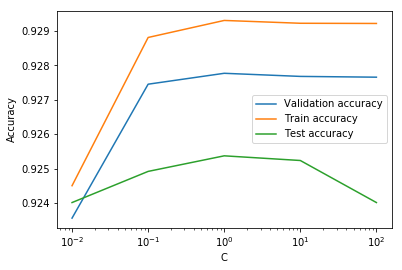

In [25]:
print ("validation scores:",validation_means,"\ntrain scores:",train_means,"\ntest scores:",test_means)
plt.plot(C_range,validation_means)
plt.plot(C_range,train_means)
plt.plot(C_range,test_means)
plt.xlabel("C")
plt.xscale('log')
plt.ylabel("Accuracy")
plt.legend(['Validation accuracy','Train accuracy','Test accuracy'], prop={'size': 10})
plt.show()